In [ ]:
from sklearn.model_selection import  train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving results.csv to results.csv


In [ ]:
from itertools import count
from collections import OrderedDict

In [ ]:
df = pd.read_csv('results.csv')

In [ ]:
df

date               team_1          team_2         _map  result_1  \
0      2020-03-18              Recon 5         TeamOne        Dust2         0   
1      2020-03-18              Recon 5         TeamOne      Inferno        13   
2      2020-03-18  New England Whalers        Station7      Inferno        12   
3      2020-03-18              Rugratz  Bad News Bears      Inferno         7   
4      2020-03-18              Rugratz  Bad News Bears      Vertigo         8   
...           ...                  ...             ...          ...       ...   
45768  2015-11-05                   G2      E-frag.net      Inferno        13   
45769  2015-11-05                   G2      E-frag.net        Dust2        16   
45770  2015-11-04                  CLG          Liquid      Inferno        16   
45771  2015-11-03                  NiP        Dignitas        Train        16   
45772  2015-11-03                  NiP            Envy  Cobblestone        16   

       result_2  map_winner  starting_ct  ct_1  t_2  t_1  ct_2  event_id  \
0            16           2            2     0    1    0    15      5151   
1            16           2            2     8    6    5    10      5151   
2            16           2            1     9    6    3    10      5243   
3            16           2            2     0    8    7     8      5151   
4            16           2            2     4    5    4    11      5151   
...         ...         ...          ...   ...  ...  ...   ...       ...   
45768        16           2            1     8    7    5     9      1970   
45769        13           1            1    10    5    6     8      1970   
45770        12           1            1     7    8    9     4      1934   
45771         4           1            2     4    1   12     3      1934   
45772         9           1            2     4    6   12     3      1934   

       match_id  rank_1  rank_2  map_wins_1  map_wins_2  match_winner  
0       2340454      62      63           0           2             2  
1       2340454      62      63           0           2             2  
2       2340461     140     118          12          16             2  
3       2340453      61      38           0           2             2  
4       2340453      61      38           0           2             2  
...         ...     ...     ...         ...         ...           ...  
45768   2299059       7      16           1           2             2  
45769   2299059       7      16           1           2             2  
45770   2299011      10      14          16          12             1  
45771   2299001       6      12          16           4             1  
45772   2299003       6       1          16           9             1  

[45773 rows x 19 columns]

In [ ]:

df.drop('_map' ,axis=1, inplace=True) # удалим колонку id

In [ ]:

df.drop('date' ,axis=1, inplace=True) # удалим колонку id

In [ ]:
a5=df['team_1'].unique()
s5=sorted(a5)
print(s5)
l_t3=np.array(s5).tolist()



['100 Thieves', '100pinggods', '1337', '1337HUANIA', '1UP', '1WIN', '2019', '24BHB', '2990', '2KILL', '2ez', '3 NEW 2 OLD', '3DMAX', '4Real', '4dimensioN', '5FRAGS', '5FRAGS.EKB', '5POWER', '5balls', '5cent', '5orgless', '6sense', '7642', '8EASY', '9z', '?', 'ACG', 'AE', 'AEON', 'AGF', 'AGG', 'AGO', 'AKARA', 'ALLIN', 'ALTERNATE aTTaX', 'ANIMALS', 'ANOX', 'ANTI ECO', 'AOES', 'ARCY', 'ARES', 'ASDF', 'ATK', 'ATMOS', 'AUGUST', 'AVANGAR', 'AVANT', 'AVEZ', 'AWTR', 'AYB', 'AZIO', 'Above the Rest', 'Absolute', 'Acapella', 'Ace High', 'Adaptation', 'Aequus', 'Aerowolf', 'Aim4R', 'Airborne', 'Ajax', 'Akatsuki', 'Akopalipsa', 'Alcoholics Anonymous', 'AliGon', 'AlienTech', 'All Knights', 'AllGamers', 'AllTheStars', 'Alma', 'Alpha', 'Alpha Red', 'Alpha Sydney', 'Alter Your Ego', 'Altima', 'Ambition', 'Ambush', 'Ancient', 'Andes', "Ange's Big Toe", 'Anonymous', 'Anunnaki', 'Anxiety', 'Apeks', 'Aperture', 'Arcade', 'ArchAngels', 'Arctic', 'Ardeont', 'Arena Bulls', 'Aria', 'Aristocracy', 'ArkAngel', '

In [ ]:
res = [{val: key for key, val in enumerate(
    OrderedDict.fromkeys(l_t3))}
    [ele] for ele in l_t3]


In [ ]:
print(res)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
uniq = res
fifa = l_t3
uniq_and_fifa = dict(zip(fifa,uniq))

In [ ]:
uniq_and_fifa

{'100 Thieves': 0,
 '100pinggods': 1,
 '1337': 2,
 '1337HUANIA': 3,
 '1UP': 4,
 '1WIN': 5,
 '2019': 6,
 '24BHB': 7,
 '2990': 8,
 '2KILL': 9,
 '2ez': 10,
 '3 NEW 2 OLD': 11,
 '3DMAX': 12,
 '4Real': 13,
 '4dimensioN': 14,
 '5FRAGS': 15,
 '5FRAGS.EKB': 16,
 '5POWER': 17,
 '5balls': 18,
 '5cent': 19,
 '5orgless': 20,
 '6sense': 21,
 '7642': 22,
 '8EASY': 23,
 '9z': 24,
 '?': 25,
 'ACG': 26,
 'AE': 27,
 'AEON': 28,
 'AGF': 29,
 'AGG': 30,
 'AGO': 31,
 'AKARA': 32,
 'ALLIN': 33,
 'ALTERNATE aTTaX': 34,
 'ANIMALS': 35,
 'ANOX': 36,
 'ANTI ECO': 37,
 'AOES': 38,
 'ARCY': 39,
 'ARES': 40,
 'ASDF': 41,
 'ATK': 42,
 'ATMOS': 43,
 'AUGUST': 44,
 'AVANGAR': 45,
 'AVANT': 46,
 'AVEZ': 47,
 'AWTR': 48,
 'AYB': 49,
 'AZIO': 50,
 'Above the Rest': 51,
 'Absolute': 52,
 'Acapella': 53,
 'Ace High': 54,
 'Adaptation': 55,
 'Aequus': 56,
 'Aerowolf': 57,
 'Aim4R': 58,
 'Airborne': 59,
 'Ajax': 60,
 'Akatsuki': 61,
 'Akopalipsa': 62,
 'Alcoholics Anonymous': 63,
 'AliGon': 64,
 'AlienTech': 65,
 'All Knigh

In [ ]:
df['team_1']=df['team_1'].replace(uniq_and_fifa)
df['team_2']=df['team_2'].replace(uniq_and_fifa)
df

team_1 team_2  result_1  result_2  map_winner  starting_ct  ct_1  t_2  \
0         791    954         0        16           2            2     0    1   
1         791    954        13        16           2            2     8    6   
2         654    916        12        16           2            1     9    6   
3         830    121         7        16           2            2     0    8   
4         830    121         8        16           2            2     4    5   
...       ...    ...       ...       ...         ...          ...   ...  ...   
45768     386    270        13        16           2            1     8    7   
45769     386    270        16        13           1            1    10    5   
45770     178    565        16        12           1            1     7    8   
45771     661    251        16         4           1            2     4    1   
45772     661    310        16         9           1            2     4    6   

       t_1  ct_2  event_id  match_id  rank_1  rank_2  map_wins_1  map_wins_2  \
0        0    15      5151   2340454      62      63           0           2   
1        5    10      5151   2340454      62      63           0           2   
2        3    10      5243   2340461     140     118          12          16   
3        7     8      5151   2340453      61      38           0           2   
4        4    11      5151   2340453      61      38           0           2   
...    ...   ...       ...       ...     ...     ...         ...         ...   
45768    5     9      1970   2299059       7      16           1           2   
45769    6     8      1970   2299059       7      16           1           2   
45770    9     4      1934   2299011      10      14          16          12   
45771   12     3      1934   2299001       6      12          16           4   
45772   12     3      1934   2299003       6       1          16           9   

       match_winner  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
...             ...  
45768             2  
45769             2  
45770             1  
45771             1  
45772             1  

[45773 rows x 17 columns]

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.drop(index=[26007,26008,28134,28147,28149,8044,8045,13360,13374,13384,25184,25185,38709,38710,39710,39712,39765,39769,39771,39776,40320,40321,40322,30728,30731,30732,30733,30735,30736,30937,30938,31153	,31154	,35970	,35977	,36308,27771	,	27785,27795	,32617,32618,35490,35498,35499,40022,40026,40258	,	40301,4668,4669,4670,17337,17338,14272,14280,14282,15633,	
               3375,3376,3429,	38272,38274,38276,38289,38303,38309,38323,38324,39136,39137,39139,39143,39153,39155,39244,39252,39266,39267,39285,39286,39679,39680,40372,40373,13363,13364,13365,16909,16912,17437,17444,17445,17446,
               44353	,44902,44903,44904,2728,2734	,2737,2738,2739,2759,2765,3874,38722, 40228, 40229, 40230, 40231, 40239, 40240, 40247, 40418,6527, 6534, 6656, 6657, 6658,35536, 35538,13669,
               34599, 34600, 34601, 35843, 35844, 35954, 35960, 36000,28004, 28005, 34783, 34784,5082, 5083, 5725, 5728, 5729,
               42620, 42621, 42946, 42947, 42949, 43151, 43153, 45344, 45347,
            45351, 45360,
            40421, 40429, 40430,25411, 25460]
               , inplace=True)


In [ ]:
df.drop (index=[115 ,
118 ,
885 ,
886 ,
890 ,
911 ,
915 ,
916 ,
924 ,
925 ,
937 ,
1092 ,
1195 ,
1196 ,
1218 ,
1219 ,
1226 ,
1244 ,
1391 ,
1419 ,
1455 ,
1456 ,
1457 ,
1458 ,
1459 ,
1460 ,
1466 ,
1500 ,
1504 ,
1505 ,
1515 ,
1516 ,
1686 ,
1687 ,
1953 ,
1954 ,
2262 ,
2268 ,
2428 ,
2429 ,
2456 ,
2457 ,
2467 ,
2468 ,
2469 ,
2533 ,
2537 ,
2547 ,
2548 ,
2645 ,
2647 ,
2649 ,
2754 ,
2755 ,
3052 ,
3057 ,
3062 ,
3070 ,
3103 ,
3107 ,
3165 ,
3174 ,
3182 ,
3202 ,
3203 ,
3204 ,
3205 ,
3206 ,
3213 ,
3214 ,
3258 ,
3358 ,
3359 ,
3360 ,
3361 ,
3843 ,
3856 ,
3857 ,
3867 ,
3895 ,
3898 ,
3901 ,
3910 ,
3926 ,
3927 ,
3964 ,
3965 ,
3971 ,
4064 ,
4067 ,
4068 ,
4076 ,
4077 ,
4319 ,
4320 ,
4408 ,
4409 ,
4423 ,
4424 ,
4479 ,
4480 ,
4643 ,
4644 ,
4645 ,
4674 ,
4675 ,
4698 ,
4703 ,
4724 ,
4725 ,
4881 ,
4882 ,
4883 ,
4913 ,
4915 ,
4916 ,
4917 ,
4918 ,
4974 ,
4983 ,
4989 ,
5148 ,
5154 ,
5344 ,
5469 ,
5472 ,
5473 ,
5483 ,
5563 ,
5565 ,
6085 ,
6109 ,
6111 ,
6162 ,
6164 ,
6165 ,
6181 ,
6182 ,
6184 ,
6277 ,
6526 ,
6531 ,
6593 ,
6596 ,
6597 ,
6600 ,
6601 ,
6900 ,
6901 ,
6977 ,
6978 ,
6979 ,
7317 ,
7318 ,
7420 ,
7421 ,
7902 ,
7903 ,
7988 ,
7995 ,
8104 ,
8105 ,
8284 ,
8285 ,
8299 ,
8307 ,
8320 ,
8322 ,
8325 ,
8331 ,
8343 ,
8344 ,
8376 ,
8377 ,
8406 ,
8407 ,
8418 ,
8522 ,
8526 ,
8547 ,
8604 ,
8743 ,
8746 ,
8795 ,
8796 ,
8797 ,
8937 ,
8959 ,
8960 ,
8976 ,
8977 ,
8983 ,
8986 ,
8997 ,
9000 ,
9005 ,
9156 ,
9498 ,
9499 ,
9969 ,
9970 ,
9999 ,
10180 ,
10181 ,
10184 ,
10195 ,
10196 ,
10197 ,
10232 ,
10241 ,
10247 ,
10248 ,
10268 ,
10273 ,
10292 ,
10293 ,
10294 ,
10394 ,
10395 ,
10476 ,
10717 ,
10718 ,
10746 ,
10769 ,
11304 ,
11332 ,
11333 ,
11465 ,
11466 ,
11475 ,
11479 ,
11960 ,
11961 ,
11964 ,
11965 ,
12097 ,
12104 ,
12120 ,
12121 ,
12128 ,
12129 ,
12139 ,
12155 ,
12156 ,
12675 ,
12676 ,
12721 ,
12722 ,
12728 ,
12733 ,
12791 ,
12792 ,
12793 ,
12879 ,
12885 ,
13172 ,
13173 ,
13611 ,
13612 ,
13667 ,
13716 ,
13717 ,
13927 ,
13928 ,
14245 ,
14299 ,
14300 ,
14301 ,
14313 ,
14314 ,
14358 ,
14390 ,
14522 ,
14531 ,
14532 ,
14570 ,
14702 ,
14703 ,
14712 ,
14818 ,
14835 ,
14953 ,
15007 ,
15010 ,
15062 ,
15064 ,
15182 ,
15258 ,
15301 ,
15376 ,
15462 ,
15463 ,
15675 ,
15687 ,
15752 ,
15758 ,
15815 ,
15935 ,
15942 ,
16072 ,
16212 ,
16216 ,
16217 ,
16355 ,
16356 ,
16365 ,
16376 ,
16490 ,
16508 ,
16509 ,
17081 ,
17082 ,
17211 ,
17218 ,
17219 ,
17224 ,
17227 ,
17239 ,
17240 ,
17386 ,
17387 ,
17572 ,
17585 ,
17586 ,
17587 ,
17592 ,
17600 ,
17622 ,
17761 ,
17762 ,
17768 ,
17769 ,
17781 ,
17782 ,
17783 ,
17885 ,
17897 ,
17899 ,
17904 ,
17916 ,
17947 ,
17953 ,
17961 ,
17966 ,
17988 ,
17996 ,
18011 ,
18012 ,
18015 ,
18016 ,
18017 ,
18076 ,
18081 ,
18082 ,
18129 ,
18130 ,
18415 ,
18422 ,
18423 ,
18424 ,
18425 ,
18426 ,
18427 ,
18603 ,
18645 ,
18651 ,
18656 ,
18657 ,
18708 ,
18709 ,
18713 ,
18716 ,
18836 ,
18845 ,
18846 ,
18850 ,
18876 ,
18927 ,
18933 ,
18934 ,
18949 ,
18950 ,
18958 ,
18961 ,
19372 ,
19373 ,
19972 ,
20191 ,
20192 ,
20226 ,
20227 ,
20249 ,
20360 ,
20361 ,
20469 ,
20470 ,
20521 ,
20522 ,
21545 ,
21546 ,
21549 ,
21558 ,
22098 ,
22161 ,
22162 ,
22176 ,
22749 ,
22750 ,
22751 ,
22978 ,
22979 ,
23325 ,
23333 ,
23334 ,
23626 ,
23631 ,
23636 ,
23637 ,
23658 ,
23659 ,
23670 ,
23794 ,
23795 ,
23796 ,
23822 ,
23823 ,
23877 ,
24053 ,
24060 ,
24075 ,
24148 ,
24270 ,
24316 ,
24326 ,
24488 ,
24489 ,
24515 ,
24525 ,
24526 ,
25127 ,
25146 ,
25803 ,
26073 ,
26074 ,
26213 ,
26215 ,
26270 ,
26271 ,
26442 ,
26445 ,
26520 ,
26530 ,
26531 ,
26534 ,
26535 ,
26572 ,
26689 ,
26690 ,
26766 ,
26770 ,
26863 ,
26872 ,
27044 ,
27077 ,
27086 ,
27087 ,
27088 ,
27120 ,
27154 ,
27205 ,
27206 ,
27421 ,
27422 ,
27423 ,
27611 ,
27614 ,
27618 ,
27619 ,
27650 ,
27655 ,
27721 ,
27723 ,
27728 ,
27733 ,
27734 ,
27802 ,
27808 ,
27810 ,
27913 ,
27914 ,
28392 ,
28402 ,
28612 ,
28613 ,
28879 ,
28881 ,
28923 ,
29003 ,
29004 ,
29144 ,
29192 ,
29300 ,
29301 ,
29310 ,
29331 ,
29440 ,
29441 ,
29636 ,
29638 ,
29650 ,
29785 ,
29788 ,
29789 ,
29872 ,
30034 ,
30035 ,
30036 ,
30139 ,
30248 ,
30385 ,
30386 ,
30439 ,
30440 ,
30473 ,
30478 ,
30486 ,
30487 ,
30533 ,
30562 ,
30681 ,
30683 ,
30689 ,
30691 ,
30692 ,
30726 ,
30727 ,
30793 ,
30798 ,
30854 ,
30860 ,
30861 ,
30866 ,
30867 ,
30868 ,
31056 ,
31057 ,
31211 ,
31212 ,
31629 ,
31637 ,
31733 ,
31918 ,
31921 ,
31997 ,
32092 ,
32130 ,
32176 ,
32177 ,
32230 ,
32234 ,
32262 ,
32263 ,
32547 ,
32551 ,
32650 ,
32651 ,
32691 ,
32885 ,
32886 ,
33011 ,
33347 ,
33469 ,
33470 ,
33609 ,
33612 ,
33962 ,
33964 ,
33998 ,
33999 ,
34018 ,
34036 ,
34078 ,
34091 ,
34122 ,
34123 ,
34124 ,
34133 ,
34135 ,
34301 ,
34302 ,
34458 ,
34473 ,
34538 ,
34539 ,
34677 ,
34684 ,
34837 ,
34844 ,
34875 ,
34916 ,
34971 ,
34972 ,
35108 ,
35112 ,
35125 ,
35126 ,
35129 ,
35147 ,
35154 ,
35156 ,
35157 ,
35191 ,
35194 ,
35220 ,
35221 ,
35263 ,
35264 ,
35346 ,
35347 ,
35348 ,
35354 ,
35355 ,
35357 ,
35366 ,
35382 ,
35395 ,
35396 ,
35426 ,
35427 ,
35464 ,
35472 ,
35548 ,
35549 ,
35554 ,
35555 ,
35619 ,
35620 ,
35702 ,
35711 ,
35759 ,
35760 ,
35792 ,
35799 ,
35834 ,
35837 ,
35838 ,
35840 ,
35841 ,
35855 ,
35859 ,
35861 ,
35867 ,
35879 ,
35880 ,
35882 ,
36031 ,
36043 ,
36269 ,
36274 ,
36352 ,
36353 ,
36357 ,
36358 ,
37090 ,
37136 ,
37181 ,
37183 ,
37310 ,
37455 ,
37602 ,
37732 ,
37790 ,
37909 ,
37913 ,
37931 ,
38095 ,
38096 ,
38162 ,
38163 ,
38319 ,
38333 ,
38382 ,
38383 ,
38420 ,
38421 ,
38496 ,
38497 ,
38499 ,
38510 ,
38511 ,
38512 ,
38539 ,
38547 ,
38576 ,
38577 ,
38589 ,
38594 ,
38598 ,
38599 ,
38698 ,
38700 ,
38707 ,
38714 ,
38846 ,
39131 ,
39151 ,
39245 ,
39246 ,
39247 ,
39269 ,
39280 ,
39302 ,
39571 ,
39572 ,
39573 ,
39574 ,
39583 ,
39638 ,
39648 ,
39656 ,
39658 ,
39696 ,
39697 ,
39900 ,
39907 ,
39997 ,
40015 ,
40130 ,
40204 ,
40219 ,
40250 ,
40261 ,
40276 ,
40287 ,
40314 ,
40318 ,
40319 ,
40463 ,
40469 ,
40471 ,
40487 ,
40493 ,
40501 ,
40516 ,
40518 ,
40523 ,
40533 ,
40663 ,
40664 ,
40667 ,
40668 ,
40732 ,
40740 ,
40836 ,
40837 ,
40860 ,
40868 ,
41004 ,
41005 ,
41173 ,
41174 ,
41238 ,
41241 ,
41255 ,
41494 ,
41496 ,
41500 ,
41502 ,
41521 ,
41524 ,
41533 ,
41565 ,
41575 ,
41650 ,
41697 ,
41698 ,
41701 ,
41702 ,
41869 ,
41870 ,
42027 ,
42031 ,
42051 ,
42052 ,
42053 ,
42068 ,
42069 ,
42070 ,
42071 ,
42072 ,
42080 ,
42092 ,
42109 ,
42112 ,
42118 ,
42119 ,
42120 ,
42154 ,
42160 ,
42161 ,
42167 ,
42168 ,
42209 ,
42210 ,
42211 ,
42212 ,
42224 ,
42230 ,
42231 ,
42753 ,
42754 ,
42888 ,
42889 ,
42914 ,
43019 ,
43020 ,
43319 ,
43323 ,
43324 ,
43374 ,
43410 ,
43411 ,
43433 ,
43434 ,
43439 ,
43447 ,
43448 ,
43449 ,
43548 ,
43554 ,
43573 ,
43577 ,
43790 ,
43795 ,
43818 ,
43819 ,
43820 ,
43830 ,
43987 ,
43988 ,
44001 ,
44003 ,
44037 ,
44041 ,
44181 ,
44182 ,
44246 ,
44247 ,
44248 ,
44372 ,
44373 ,
44380 ,
44381 ,
44382 ,
44383 ,
44384 ,
44387 ,
44412 ,
44413 ,
44438 ,
44439 ,
44440 ,
44448 ,
44449 ,
44460 ,
44461 ,
44464 ,
44687 ,
44688 ,
44824 ,
44827 ,
44834 ,
44838 ,
44854 ,
44857 ,
44888 ,
44889 ,
45082 ,
45083 ,
45104 ,
45105 ,
45110 ,
45111 ,
45112 ,
45121 ,
45122 ,
45126 ,
45127 ,
45136 ,
45140 ,
45150 ,
45151 ,
45152 ,
45395 ,
45401 ,
45403 ,
45407 ,
45643 ,
45651 ,
45653	], inplace=True)

In [ ]:
for elem in df.team_2:
  if type (elem)==str:
    print(elem)


In [ ]:
df4=(df.to_string())
df4

'       team_1 team_2  result_1  result_2  map_winner  starting_ct  ct_1  t_2  t_1  ct_2  event_id  match_id  rank_1  rank_2  map_wins_1  map_wins_2  match_winner\n0         791    954         0        16           2            2     0    1    0    15      5151   2340454      62      63           0           2             2\n1         791    954        13        16           2            2     8    6    5    10      5151   2340454      62      63           0           2             2\n2         654    916        12        16           2            1     9    6    3    10      5243   2340461     140     118          12          16             2\n3         830    121         7        16           2            2     0    8    7     8      5151   2340453      61      38           0           2             2\n4         830    121         8        16           2            2     4    5    4    11      5151   2340453      61      38           0           2             2\n5         882    302 

In [ ]:
df.items()

<generator object DataFrame.items at 0x7f5acb7064d0>

In [ ]:
import re

In [ ]:
df.team_2.value_counts

<bound method IndexOpsMixin.value_counts of 0        954
1        954
2        916
3        121
4        121
        ... 
45768    270
45769    270
45770    565
45771    251
45772    310
Name: team_2, Length: 44718, dtype: object>

In [ ]:
from sklearn.model_selection import train_test_split
X_train1 ,X_test1,y_train1,y_test1=train_test_split(
df.iloc[:,:-1],
df.iloc[:,-1],
test_size=0.20    
)


[Text(0.4125, 0.9166666666666666, 'X[4] <= 1.5\ngini = 0.498\nsamples = 35774\nvalue = [18998, 16776]'),
 Text(0.2, 0.75, 'X[14] <= 1.5\ngini = 0.195\nsamples = 19023\nvalue = [16939, 2084]'),
 Text(0.15, 0.5833333333333334, 'gini = 0.0\nsamples = 2073\nvalue = [0, 2073]'),
 Text(0.25, 0.5833333333333334, 'X[0] <= 17.5\ngini = 0.001\nsamples = 16950\nvalue = [16939, 11]'),
 Text(0.15, 0.4166666666666667, 'X[11] <= 2306199.0\ngini = 0.023\nsamples = 170\nvalue = [168, 2]'),
 Text(0.1, 0.25, 'X[10] <= 2495.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 164\nvalue = [164, 0]'),
 Text(0.35, 0.4166666666666667, 'X[15] <= 2.5\ngini = 0.001\nsamples = 16780\nvalue = [16771, 9]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 11428\nvalue = [11428, 0]'),
 Text(0.4, 0.25, 'X[14] <= 3.0\ngini = 0.003\nsamples 

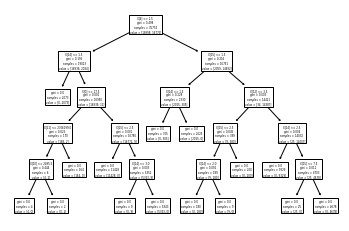

In [ ]:
from numpy import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from numpy.random import *
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Ridge
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(X_train1,y_train1)
from sklearn import tree
tree.plot_tree(Classifier)

In [ ]:
y_pred=Classifier.predict(X_test1)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df.iloc[:,:-1]

team_1 team_2  result_1  result_2  map_winner  starting_ct  ct_1  t_2  \
0         791    954         0        16           2            2     0    1   
1         791    954        13        16           2            2     8    6   
2         654    916        12        16           2            1     9    6   
3         830    121         7        16           2            2     0    8   
4         830    121         8        16           2            2     4    5   
...       ...    ...       ...       ...         ...          ...   ...  ...   
45768     386    270        13        16           2            1     8    7   
45769     386    270        16        13           1            1    10    5   
45770     178    565        16        12           1            1     7    8   
45771     661    251        16         4           1            2     4    1   
45772     661    310        16         9           1            2     4    6   

       t_1  ct_2  event_id  match_id  rank_1  rank_2  map_wins_1  map_wins_2  
0        0    15      5151   2340454      62      63           0           2  
1        5    10      5151   2340454      62      63           0           2  
2        3    10      5243   2340461     140     118          12          16  
3        7     8      5151   2340453      61      38           0           2  
4        4    11      5151   2340453      61      38           0           2  
...    ...   ...       ...       ...     ...     ...         ...         ...  
45768    5     9      1970   2299059       7      16           1           2  
45769    6     8      1970   2299059       7      16           1           2  
45770    9     4      1934   2299011      10      14          16          12  
45771   12     3      1934   2299001       6      12          16           4  
45772   12     3      1934   2299003       6       1          16           9  

[44718 rows x 16 columns]

In [ ]:
df.drop('map_winner' ,axis=1, inplace=True) # удалим колонку id


In [ ]:
df.drop('event_id' ,axis=1, inplace=True) # удалим колонку id

In [ ]:
df.drop('match_id' ,axis=1, inplace=True) # удалим колонку id

In [ ]:
print("Правильность на обучающем наборе: {:.2f}".format(Classifier.score(X_train1, y_train1)))
print("Правильность на тестовом наборе: {:.2f}".format(Classifier.score(X_test1,y_test1)))

#Выведем коэффициенты модели 
#Делаем прогноз
y_pred=Classifier.predict(X_test1)
#Сравним фактические значения с прогнозируемыми
df_new=pd.DataFrame({'Actual':y_test1,'Predicted':y_pred})
print(df_new)
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test1,y_pred))




Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 1.00
       Actual  Predicted
15032       1          1
11562       1          1
11128       1          1
12522       2          2
10452       1          1
...       ...        ...
15772       2          2
10909       2          2
26489       1          1
2432        1          1
21854       1          1

[8944 rows x 2 columns]
Mean sequared Error : 0.0


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam

In [ ]:
df

team_1 team_2  result_1  result_2  starting_ct  ct_1  t_2  t_1  ct_2  \
0         791    954         0        16            2     0    1    0    15   
1         791    954        13        16            2     8    6    5    10   
2         654    916        12        16            1     9    6    3    10   
3         830    121         7        16            2     0    8    7     8   
4         830    121         8        16            2     4    5    4    11   
...       ...    ...       ...       ...          ...   ...  ...  ...   ...   
45768     386    270        13        16            1     8    7    5     9   
45769     386    270        16        13            1    10    5    6     8   
45770     178    565        16        12            1     7    8    9     4   
45771     661    251        16         4            2     4    1   12     3   
45772     661    310        16         9            2     4    6   12     3   

       rank_1  rank_2  map_wins_1  map_wins_2  match_winner  
0          62      63           0           2             2  
1          62      63           0           2             2  
2         140     118          12          16             2  
3          61      38           0           2             2  
4          61      38           0           2             2  
...       ...     ...         ...         ...           ...  
45768       7      16           1           2             2  
45769       7      16           1           2             2  
45770      10      14          16          12             1  
45771       6      12          16           4             1  
45772       6       1          16           9             1  

[44718 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/500
2236/2236 [==============================] - 9s 3ms/step - loss: 41079.9727 - mean_absolute_error: 164.4447
Epoch 2/500
2236/2236 [==============================] - 7s 3ms/step - loss: 17330.2402 - mean_absolute_error: 107.1791
Epoch 3/500
2236/2236 [==============================] - 6s 3ms/step - loss: 5299.2930 - mean_absolute_error: 58.1195
Epoch 4/500
2236/2236 [==============================] - 6s 3ms/step - loss: 924.9045 - mean_absolute_error: 22.8863
Epoch 5/500
2236/2236 [==============================] - 6s 3ms/step - loss: 184.5939 - mean_absolute_error: 9.5884
Epoch 6/500
2236/2236 [==============================] - 6s 3ms/step - loss: 63.0109 - mean_absolute_error: 5.5183
Epoch 7/500
2236/2236 [==============================] - 6s 3ms/step - loss: 13.9018 - mean_absolute_error: 2.6505
Epoch 8/500
2236/2236 [==============================] - 6s 3ms/step - loss: 1.8978 - mean_absolute_error: 1.0491
Epoch 9/500
2236/2236 [==============================] - 6s 3ms/s

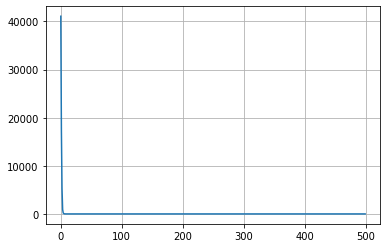

In [ ]:
from sklearn.model_selection import train_test_split
X_train_nero ,X_test_nero,y_train_nero,y_test_nero=train_test_split(
df.iloc[:,:-1],
df.iloc[:,-1],
test_size=0.20    
)



model = Sequential([Dense(1, activation=None, input_shape=[13])])
model.compile(loss='mean_squared_error', optimizer=Nadam(lr=0.0001), metrics=['mean_absolute_error'])

X_train_nero = np.asarray(X_train_nero).astype(np.float32)

y_train_nero = np.asarray(y_train_nero).astype(np.float32)

X_test_nero = np.asarray(X_test_nero).astype(np.float32)

history=model.fit(X_train_nero, y_train_nero, batch_size=16, epochs=500)

print(model.predict(X_test_nero))
print(model.layers[0].get_weights())
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import roc_auc_score 
X_train5, X_test5, y_train5,  y_test5=train_test_split(
df.iloc[:,:-1], #Возьмем все колонки кроме последней в признаки
df.iloc[:,-1], #Последнюю  в целевую переменную (берем как класс)
test_size=0.20 #Размер тестовой выборки 20%
)
# далее - (X, y) - для обучения, (X2, y2) - для контроля
# модель - регрессор 
model =  RandomForestRegressor(n_estimators=100,                              
                               oob_score=True,
                               random_state=1) 
model.fit(X_train5, y_train5) # обучение 
a = model.predict(X_test5) # предсказание  
print ("AUC-ROC (oob) = ", roc_auc_score(y_train5, model.oob_prediction_)) 
print ("AUC-ROC (test) = ", roc_auc_score(y_test5, a))

AUC-ROC (oob) =  0.9999999058856082
AUC-ROC (test) =  0.9999993220686247


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X_train00 ,X_test00,y_train00,y_test00=train_test_split(
df.iloc[:,:-1].values,
df.iloc[:,-1].values,
test_size=0.20    
)
regressor.fit(X_train00,y_train00)

DecisionTreeClassifier()

[Text(0.4895833333333333, 0.95, 'X[13] <= 1.5\ngini = 0.498\nsamples = 35774\nvalue = [18906, 16868]'),
 Text(0.45625, 0.85, 'gini = 0.0\nsamples = 11778\nvalue = [0, 11778]'),
 Text(0.5229166666666667, 0.85, 'X[14] <= 15.5\ngini = 0.334\nsamples = 23996\nvalue = [18906, 5090]'),
 Text(0.3125, 0.75, 'X[14] <= 14.5\ngini = 0.006\nsamples = 18569\nvalue = [18511, 58]'),
 Text(0.20833333333333334, 0.65, 'X[0] <= 17.5\ngini = 0.003\nsamples = 18458\nvalue = [18430, 28]'),
 Text(0.1, 0.55, 'X[10] <= 2306199.0\ngini = 0.051\nsamples = 191\nvalue = [186, 5]'),
 Text(0.06666666666666667, 0.45, 'X[10] <= 2305509.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.03333333333333333, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13333333333333333, 0.45, 'gini = 0.0\nsamples = 182\nvalue = [182, 0]'),
 Text(0.31666666666666665, 0.55, 'X[5] <= 0.5\ngini = 0.003\nsamples = 18267\nvalue = [18244, 23]'),
 Text(0.2, 0.45, 'X[1

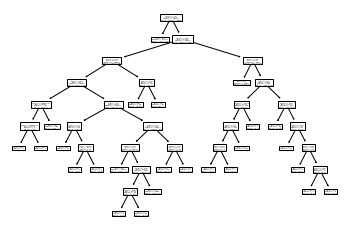

In [ ]:
from sklearn import tree
tree.plot_tree(regressor)

In [ ]:
y_pred00=regressor.predict(X_test00)

In [ ]:
df_new00=pd.DataFrame({'actual':y_test00,'predict':y_pred00})
df_new

Actual  Predicted
0          2   1.715356
1          2   1.737113
2          1   1.236902
3          1   1.307251
4          2   2.265881
...      ...        ...
8939       1   1.171746
8940       2   1.783392
8941       2   1.920885
8942       2   1.554158
8943       1   1.328675

[8944 rows x 2 columns]

In [ ]:
from sklearn import metrics
print('Mean Squered Error:',metrics.mean_squared_error(y_test00,y_pred00))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test00,y_pred00))

Mean Squered Error: 0.0004472271914132379
Mean Absolute Error: 0.0004472271914132379


In [ ]:
from numpy import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from numpy.random import *
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Ridge
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor= LinearRegression()
regressor = regressor.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(regressor.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(regressor.score(X_test,y_test)))

#Выведем коэффициенты модели 
#Делаем прогноз
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df_new=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df_new)
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test,y_pred))
y_pred=regressor.predict(X_test)
#Визуализируем резуьтат представления в гистограммы 





Правильность на обучающем наборе: 0.59
Правильность на тестовом наборе: 0.59
      Actual  Predicted
0          2   1.715356
1          2   1.737113
2          1   1.236902
3          1   1.307251
4          2   2.265881
...      ...        ...
8939       1   1.171746
8940       2   1.783392
8941       2   1.920885
8942       2   1.554158
8943       1   1.328675

[8944 rows x 2 columns]
Mean sequared Error : 0.10248116954770753


In [ ]:
print(regressor.predict(([[68,69,24,27,0.50000,0.50000]])))

ValueError: ignored

In [ ]:
from sklearn.svm import SVR

In [ ]:
X_train01,X_test01,y_train01,y_test01=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_train01, y_train01.ravel())

SVR(gamma='auto')

In [ ]:
print("Правильность на обучающем наборе: {:.2f}".format(regressor.score(X_train01, y_train01)))
print("Правильность на тестовом наборе: {:.2f}".format(regressor.score(X_test01,y_test01)))


Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 1.00


In [ ]:
y_predskaz=svr_regressor.predict(X_test01)
#Сравним фактические значения с прогнозируемыми
#df_predskaz=pd.DataFrame({'Actual':y_test,
 #                         'Predicted':y_predskaz})
#print(df_predskaz)
#Оценка производительности алгоритма
print(y_predskaz[200],y_test01[200]) 
print('Mean sequared Error :',metrics.mean_squared_error(y_test01,y_predskaz))

1.4761117546875215 1
Mean sequared Error : 0.23208896598057602


In [ ]:
X_train07, X_test07, y_train07,  y_test07=train_test_split(
df.iloc[:,:-1], #Возьмем все колонки кроме последней в признаки
df.iloc[:,-1], #Последнюю  в целевую переменную (берем как класс)
test_size=0.20 #Размер тестовой выборки 20%
)

Y-Предсказание =  [2 2 1 ... 1 1 1]
accuracy:0.6
Кол-во не верных значений =  3578
[[3123 1636]
 [1942 2243]]


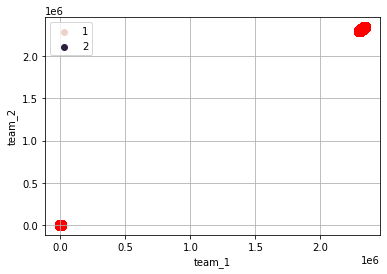

In [ ]:

#Обучим модель трех ближних соседий 
model2=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9)
model2.fit(X_train07, y_train07)
#Получаем предсказание модели 
y_pred07=model2.predict(X_test07)
print('Y-Предсказание = ',y_pred07)
#Пркажем на графике что отражает полученное число 
sns.scatterplot(
    data=df, #Из этой таблици рисуем точки
    x='team_1',y='team_2', #Коордитнаты 
    hue='match_winner', #Для которых цвет определить согласно этому столбцу
    s=70 #Размер точек 
)
count=0
plt.xlabel('team_1')
plt.ylabel('team_2')
plt.legend(loc=2) #Добавить легенду
plt.grid() #Добавить 
error_rates=[]
#Краным цветом обозначенный точки для которых классификация сработала не верно 


#Перебираем все объекты из текса 
for i in range(len(y_test07)):
  #Если предсказание не верное 
  if np.array(y_test07)[i]!=y_pred07[i]:
  
    count=count+1
    #Качество модели (доля правильно классифицированных точек)
    from sklearn.metrics import  accuracy_score
print(f'accuracy:{accuracy_score(y_test07,y_pred07) :.4}')

print('Кол-во не верных значений = ',count)
cm=confusion_matrix(y_test07,y_pred07)
ac=accuracy_score(y_test07,y_pred07)
print(cm)